<a href="https://colab.research.google.com/github/schizohub/ML_projects/blob/main/Tashkent_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calling necessary packages**



In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import BayesianRidge

# Definition of rows:
- `location` - address of house
- `district` - region of house
- `rooms` - number of rooms
- `size` - size of house (sqrd.m)
- `level` - stage of house
- `max_levels` - number of stages
- `price` - price of house


# Calling dataset

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Cleaning dataset

In [12]:
df['size'].unique()
x = ['Площадьземли:1сот']
y = ['Договорная']
df.drop(df[df['price'].isin(y)].index,inplace=True)
df.drop(df[df['size'].isin(x)].index,inplace=True)
df['size'] = df['size'].astype(float)
df['price'] = df['price'].astype(int)
df.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   int64  
 3   size        7465 non-null   float64
 4   level       7465 non-null   int64  
 5   max_levels  7465 non-null   int64  
 6   price       7465 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 466.6+ KB


In [13]:
df.corrwith(df['price'])

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
f = [df['size'].max()]
df[df['size'].isin(f)]
df[df['size']>500].index
df.drop([981, 2268, 2547, 2662, 3089, 4615, 4784, 5456, 7043, 7421],inplace=True)

In [15]:
df[df['price']>1_000_000].index
df.drop([330, 1744, 5903, 6133, 6517, 6952, 7081, 7296, 7466],inplace=True)

In [16]:
df[df['rooms']==10]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Vizualization dataset

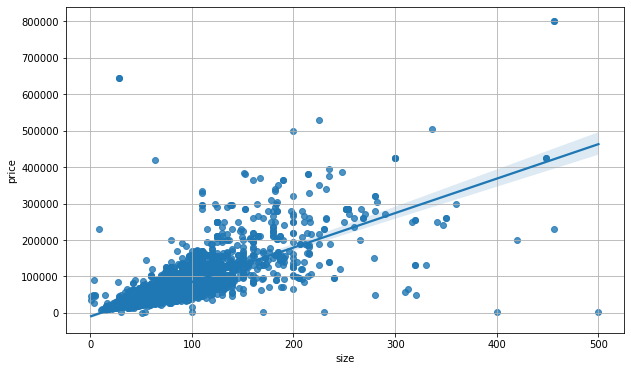

In [17]:
plt.figure(figsize=(10,6))
# sns.scatterplot(data=df,x='size',y='price')
sns.regplot(data=df,x='size',y='price')
plt.grid()
plt.show()

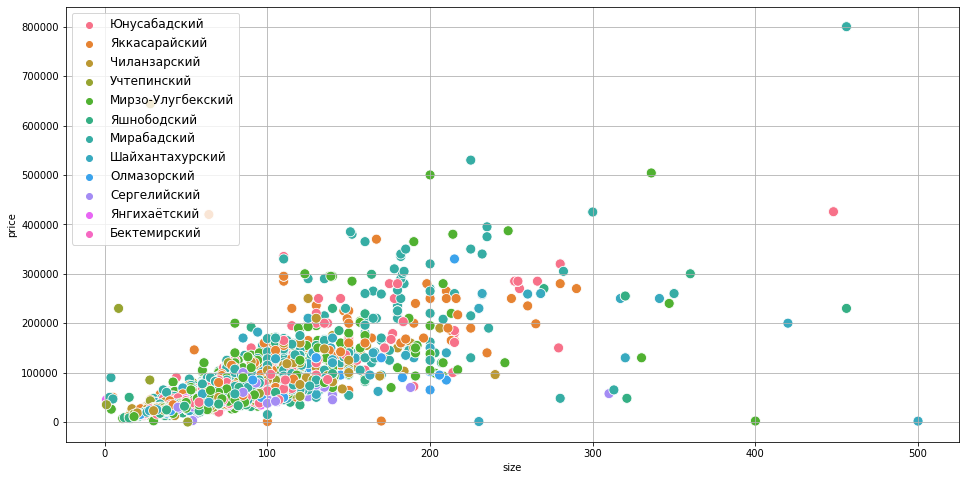

In [18]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df,x='size',y='price',hue='district',s=100)
plt.legend(loc=0,fontsize='large')
plt.grid(which='major')
plt.show()


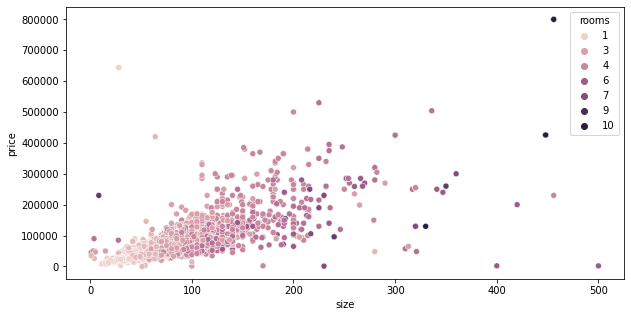

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='size',y='price',hue='rooms')
plt.show()

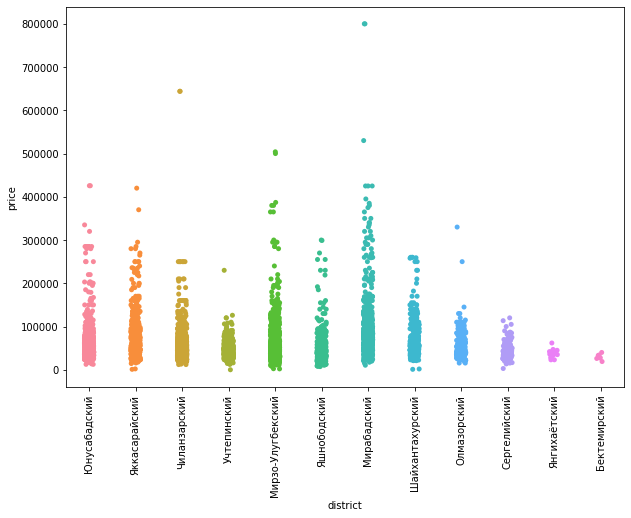

In [20]:
plt.figure(figsize=(10,7))
sns.stripplot(data=df,x=df['district'],y=df['price'])
plt.xticks(rotation=90)
plt.show()

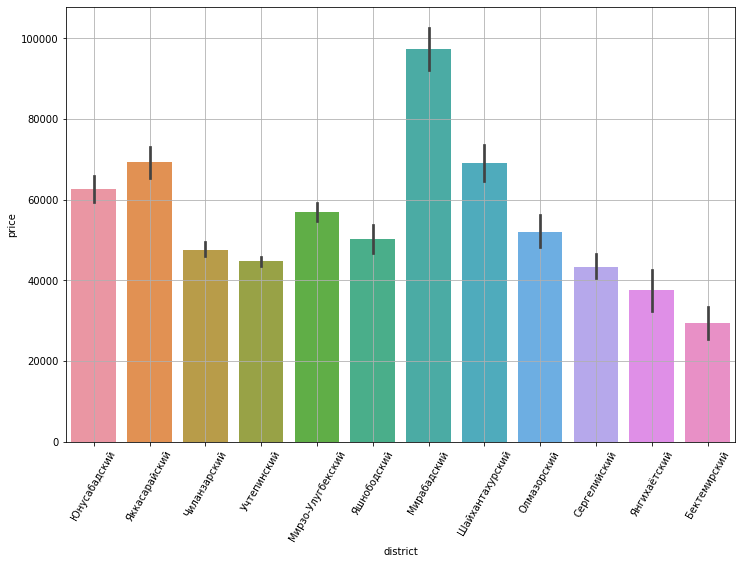

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['district'],y=df['price'])
plt.xticks(rotation=60)
plt.grid()
plt.show()

In [22]:
bams = {'Юнусабадский':1, 'Яккасарайский':2, 'Чиланзарский':3, 'Учтепинский':4,
       'Мирзо-Улугбекский':5, 'Яшнободский':6, 'Мирабадский':7,
       'Шайхантахурский':8, 'Олмазорский':9, 'Сергелийский':10, 'Янгихаётский':11,
       'Бектемирский':12}
df['district'].unique()
df2 = df[['district','rooms','price']]
df2 = df2.groupby(['rooms','district']).max()
df2 = df2.unstack(level=1)
df2.fillna(method='ffill',inplace=True)

In [23]:
df['district'].unique()
x_labels = ['Юнусабадский', 'Яккасарайский', 'Чиланзарский', 'Учтепинский',
       'Мирзо-Улугбекский', 'Яшнободский', 'Мирабадский',
       'Шайхантахурский', 'Олмазорский', 'Сергелийский', 'Янгихаётский',
       'Бектемирский']

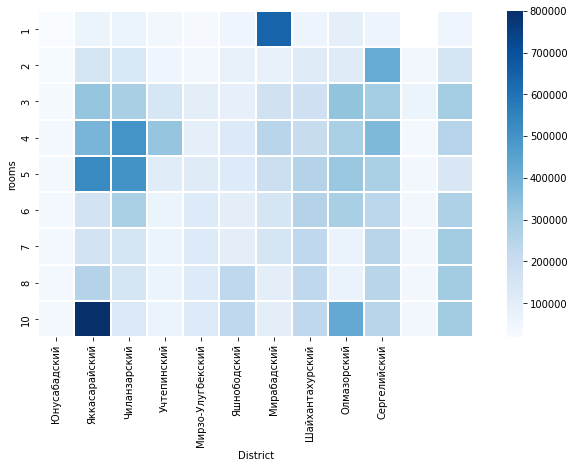

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df2,linewidths=1,square=True,cmap='Blues')
plt.xticks(np.arange(10)+.5,labels=x_labels)
plt.xlabel('District')
plt.show()

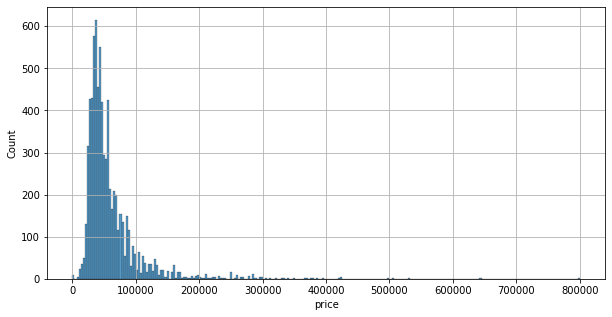

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='price')
plt.grid()
plt.show()

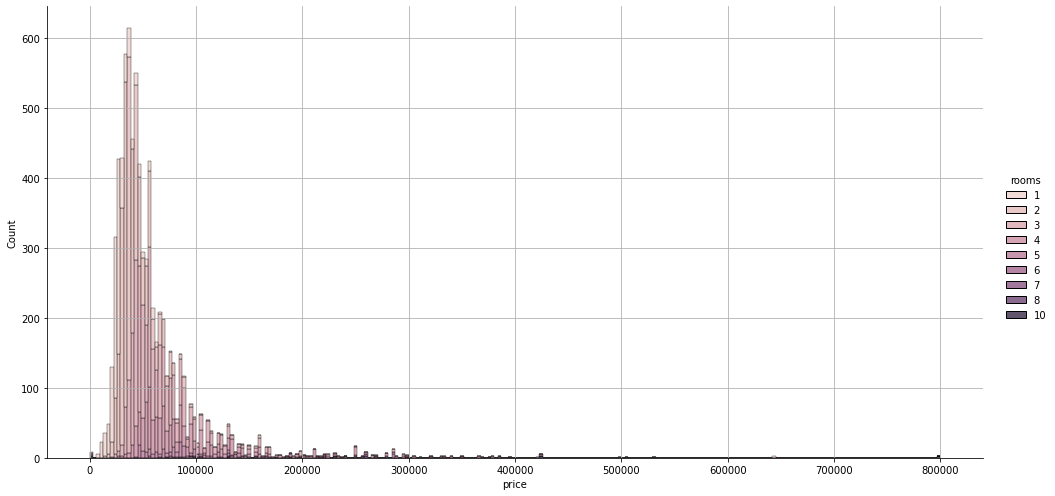

In [26]:
sns.displot(data=df,x='price',hue='rooms',multiple='stack' ,height=7,aspect=2)
plt.grid()
plt.show()

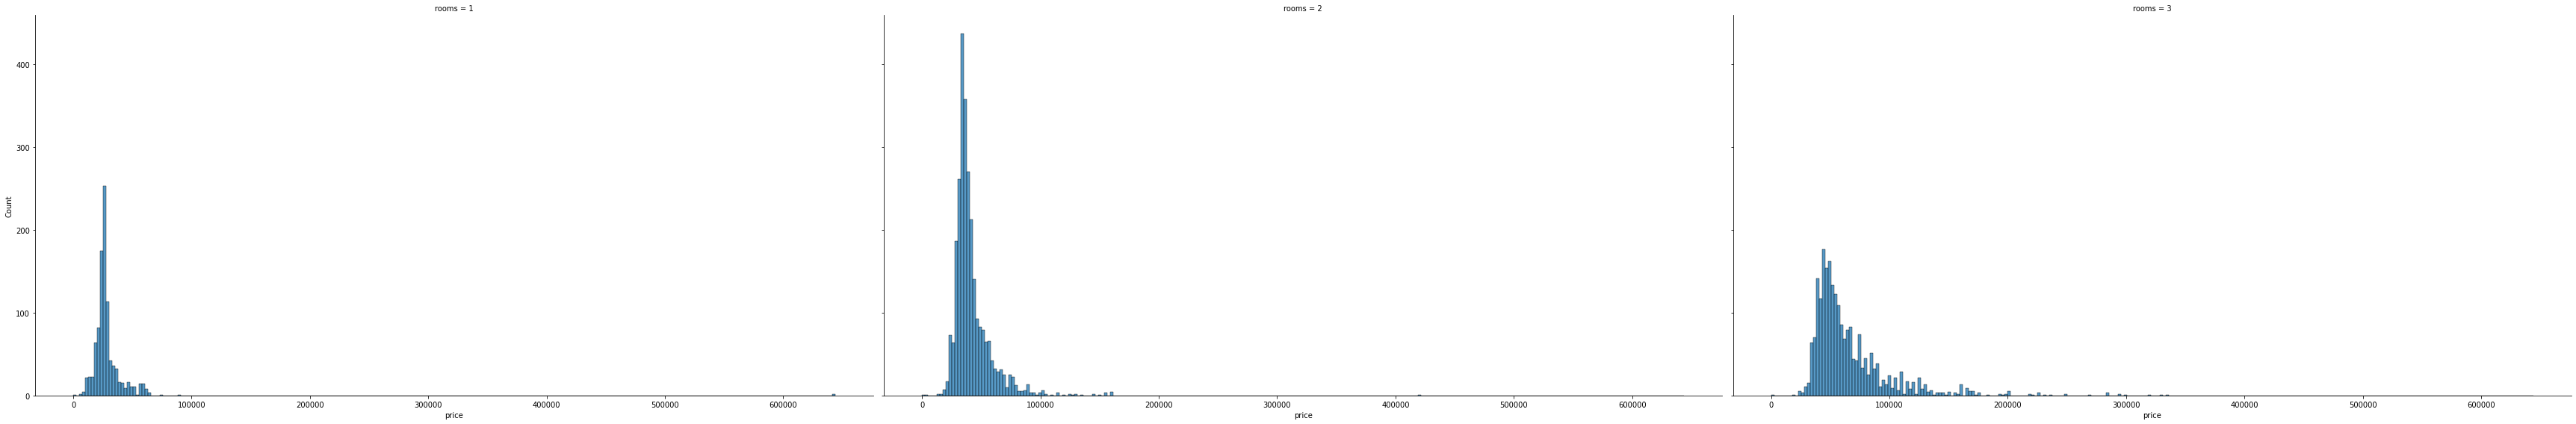

In [27]:
df_new = df[df['rooms']<4]
sns.displot(data=df_new,x='price',col='rooms',height=8, aspect=2)
plt.show()

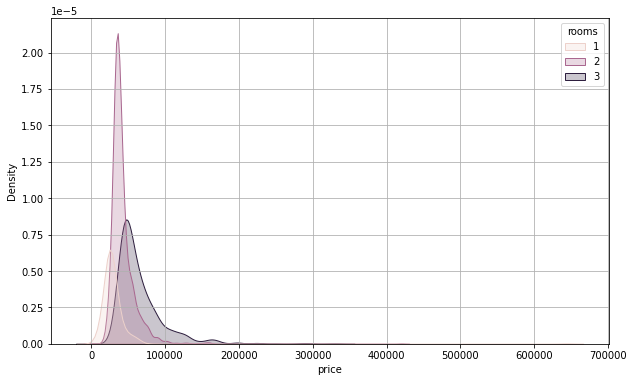

In [28]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_new,x='price',hue='rooms',shade=True)
plt.grid(which='both')
plt.show()

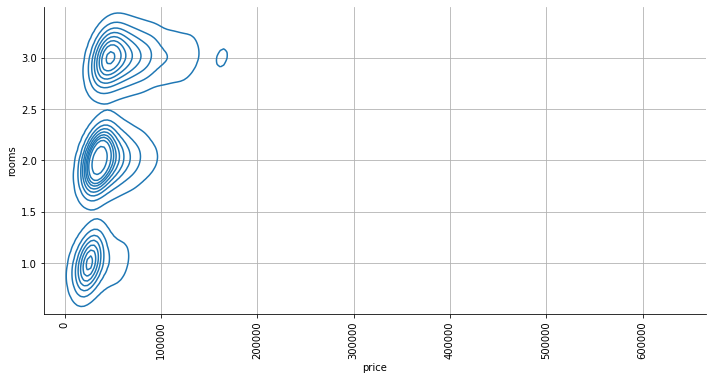

In [29]:
sns.displot(data=df_new, x="price", y="rooms", kind="kde", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='major')
plt.show()

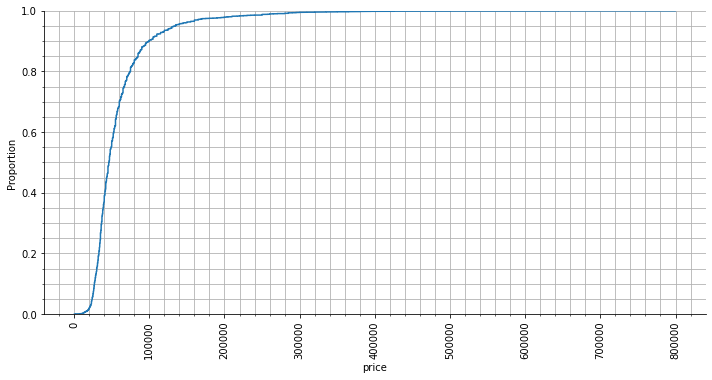

In [30]:
sns.displot(data=df, x="price", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()

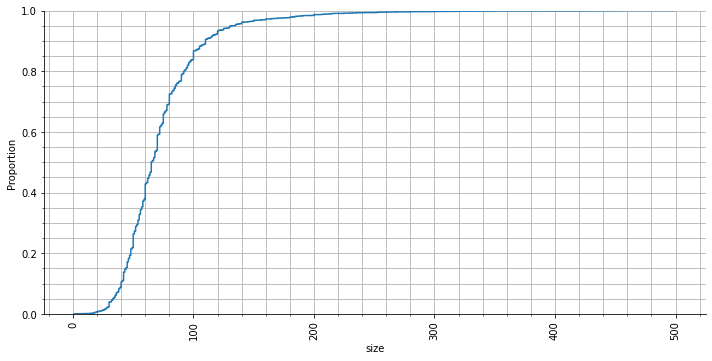

In [31]:
sns.displot(data=df, x="size", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()

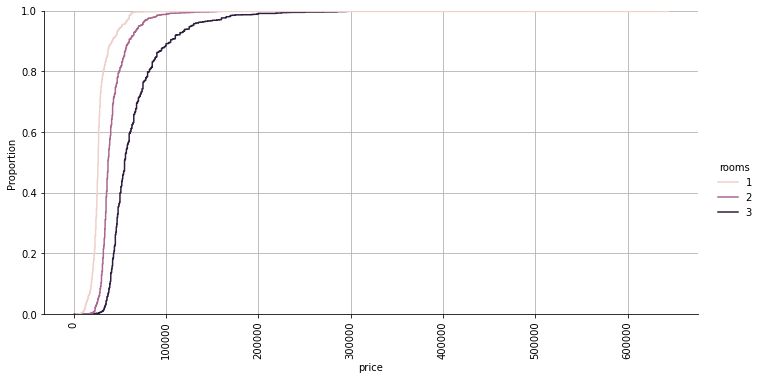

In [32]:
sns.displot(data=df_new, x="price", hue="rooms", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid()
plt.show()

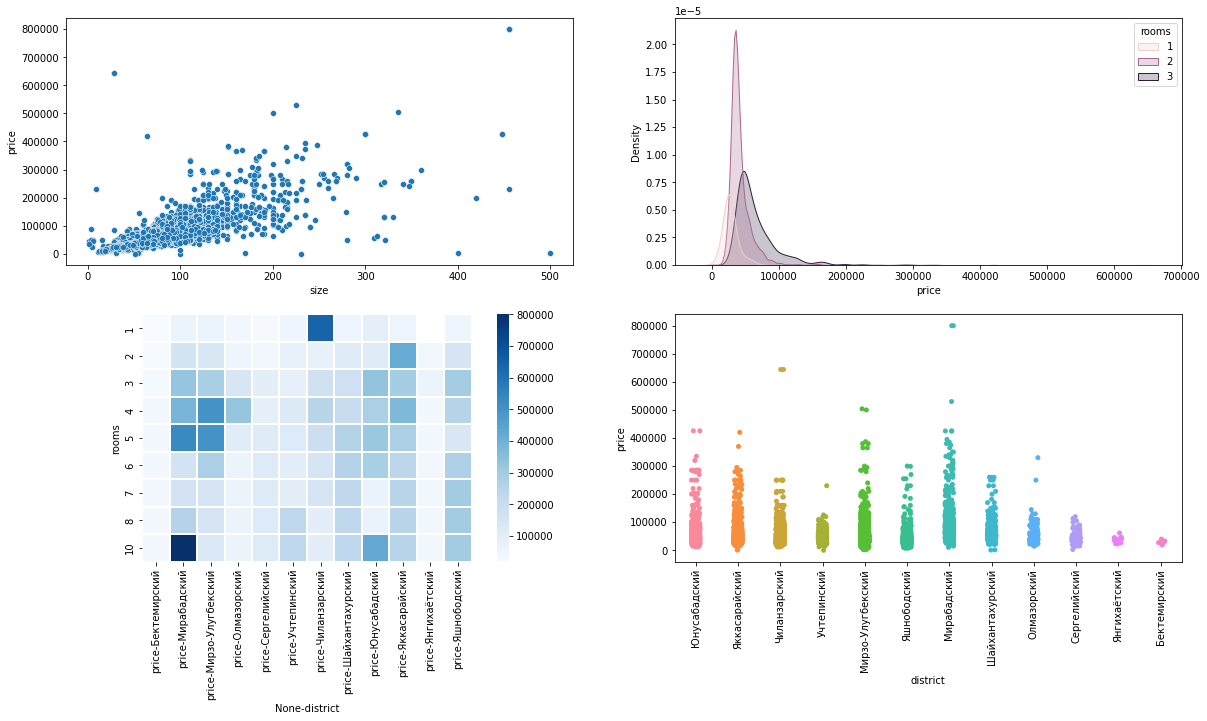

In [33]:
fig,ax = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(ax=ax[0,0],data=df,x='size',y='price')
sns.kdeplot(ax=ax[0,1],data=df_new,x='price',hue='rooms',shade=True)
sns.heatmap(ax=ax[1,0],data=df2,linewidths=1,square=True,cmap='Blues')
sns.stripplot(ax=ax[1,1],data=df,x=df['district'],y=df['price'])
plt.xticks(rotation=90)
plt.show()

In [34]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 7446 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7446 non-null   object 
 1   district    7446 non-null   object 
 2   rooms       7446 non-null   int64  
 3   size        7446 non-null   float64
 4   level       7446 non-null   int64  
 5   max_levels  7446 non-null   int64  
 6   price       7446 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 723.4+ KB


# Preparing dataset for Machine Learning

In [36]:
train_set, test_set = train_test_split(df, test_size=0.35,random_state=40)

In [47]:
X_train = train_set.drop(['district','price','location'],axis=1)
y_train = train_set['price']
X_test = test_set.drop(['district','price','location'],axis=1)
y_test = test_set['price']
y_test

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [43]:
std = StandardScaler()
X = std.fit_transform(X_train)
X[:5]

array([[-1.49823752, -1.15038616, -0.75948557, -0.77778326],
       [-0.57231525, -0.27053436,  0.55525948, -0.39791919],
       [-0.57231525, -0.61714264,  0.11701113, -0.77778326],
       [ 0.35360702,  0.34269568,  0.11701113,  1.12153708],
       [ 0.35360702, -0.08389913,  0.11701113, -0.77778326]])

# ML(Linear Regression)

In [44]:
linear_model = LinearRegression()
linear_model.fit(X,y_train)

LinearRegression()

In [87]:
linear_model.coef_
linear_model.intercept_

58596.14507129572

In [67]:
X_test = std.fit_transform(X_test)
X_test_predicted = linear_model.predict(X_test)

In [48]:
mae = mean_absolute_error(y_test,X_test_predicted)
print('Mean Absolute Error of Linear Regression:', mae)

Mean Absolute Error of Linear Regression: 15317.462826751096


In [52]:
mrse = mean_squared_error(y_test,X_test_predicted)
print('Mean percantage error of Linear Regression:', np.sqrt(mrse))

Mean percantage error of Linear Regression: 32681.600154951302


In [74]:
scores = cross_val_score(linear_model, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [75]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [76]:
display_scores(LR_rmse_scores)

Scores: [34719.29500859 47253.85541012 25874.12011588 20721.24097045
 26171.31765604 18191.02214736 39092.80184491 20931.79482033
 31263.49711223 49272.04500725]
Mean: 31349.099009316804
Std.dev: 10473.37168809115


# ML(Decision Tree)

In [69]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X,y_train)

DecisionTreeRegressor()

In [71]:
x_tree = tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test,x_tree)
print('Mean Absolute Error of Decision Tree:', mae_tree)

Mean Absolute Error of Decision Tree: 14883.834100864477


In [72]:
mrse_tree = mean_squared_error(y_test,x_tree)
print('Mean squared error of Decision Tree:', np.sqrt(mrse_tree))

Mean squared error of Decision Tree: 33175.055476566326


In [77]:
scores_tree = cross_val_score(tree_model, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
scores_rmse_tree = np.sqrt(-scores_tree)
display_scores(scores_rmse_tree)

Scores: [60334.35539915 44916.90270014 30463.70884144 25379.32389012
 28892.39929928 23832.02130069 49637.28151261 24624.28795244
 51909.06077059 61398.5067817 ]
Mean: 40138.784844815746
Std.dev: 14338.647822217552


# ML(Random Forest)

In [82]:
rf_model = RandomForestRegressor()
rf_model.fit(X,y_train)

RandomForestRegressor()

In [83]:
x_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test,x_rf)
print('Mean absolute error of Random Forest:', mae_rf)

Mean absolute error of Random Forest: 13235.166231128


In [84]:
mrse_rf = mean_squared_error(y_test,x_rf)
print('Mean squared error of Random Forest:',np.sqrt(mrse_rf))

Mean squared error of Random Forest: 28361.241877141503


In [92]:
scores_rf = cross_val_score(rf_model, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
scores_rmse_rf = np.sqrt(-scores_rf)
display_scores(scores_rmse_rf)

Scores: [43278.10629502 43648.65248649 23155.32013774 18497.33056669
 24439.98720247 19653.38346201 39303.09129524 26912.68743661
 34210.29026743 47433.51692308]
Mean: 32053.236607278115
Std.dev: 10272.76175806928


# ML(Support Vector Machines)

In [89]:
svm = SVC()
svm.fit(X,y_train)

SVC()

In [90]:
x_svm = svm.predict(X_test)
mae_svm = mean_absolute_error(y_test,x_svm)
print('Mean absolute error of SVC:', mae_svm)

Mean absolute error of SVC: 16094.138473341005


In [91]:
rmse_svm = mean_squared_error(y_test,x_svm)
print('Mean squared error of SVC:',np.sqrt(rmse_svm))

Mean squared error of SVC: 34595.769688540524


In [93]:
scores_svm = cross_val_score(svm, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
scores_rmse_svm = np.sqrt(-scores_svm)
display_scores(scores_rmse_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:The least populated class in y has only 1 members, which is less than n_splits=10.


Scores: [58672.39169587 35465.83747221 24556.77205198 30810.20731064
 46376.95385125 39670.63731576 34253.79833232 30134.08112286
 42686.91079729 31826.12447388]
Mean: 37445.37144240744
Std.dev: 9338.426472224026


# ML(Bayesian Ridge Regression)

In [115]:
ridge_model = BayesianRidge()
ridge_model.fit(X,y_train)

BayesianRidge()

In [96]:
x_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test,x_ridge)
print('Mean absolute error of Bayesian Ridge:', mae_ridge)

Mean absolute error of Bayesian Ridge: 15318.963853916164


In [97]:
rmse_ridge = mean_squared_error(y_test,x_ridge)
print('Mean squared error of SVC:',np.sqrt(rmse_ridge))

Mean squared error of SVC: 32684.169033043137


In [98]:
scores_ridge = cross_val_score(ridge_model, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
scores_rmse_ridge = np.sqrt(-scores_ridge)
display_scores(scores_rmse_ridge)

Scores: [34761.8841958  47263.8197846  25866.01519334 20719.2733507
 26182.5211787  18181.75475454 39070.60220619 20955.13913772
 31281.38439288 49234.73320104]
Mean: 31351.712739551695
Std.dev: 10467.147480468055
